In [1]:
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [2]:
Ground_Truth_BBOX = [1900, 700, 1800, 1800]
Prediction_BBOX = [1800, 800, 1500, 1500]

## 轉換成 [X0,Y0,X1,Y1]

In [3]:
Ground_Truth_BBOX_Transform = [Ground_Truth_BBOX[0], Ground_Truth_BBOX[1],
                               Ground_Truth_BBOX[0] + Ground_Truth_BBOX[2],
                               Ground_Truth_BBOX[1] + Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform = [Prediction_BBOX[0], Prediction_BBOX[1],
                             Prediction_BBOX[0] + Prediction_BBOX[2],
                             Prediction_BBOX[1] + Prediction_BBOX[3]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDe

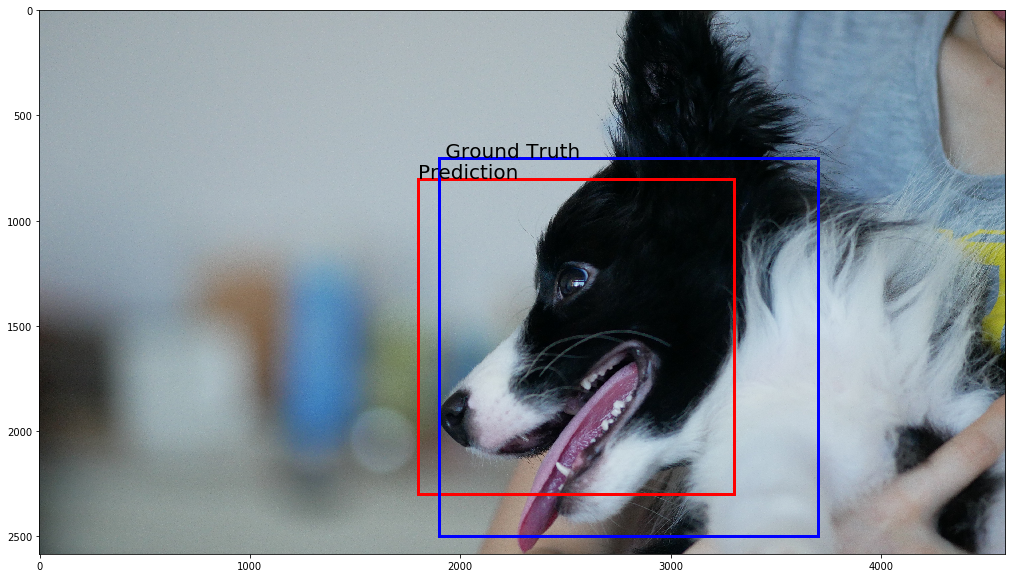

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)

fig, ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0], Prediction_BBOX[1]), Prediction_BBOX[2],
                         Prediction_BBOX[3], linewidth=3, edgecolor='r', facecolor='none',)
ax.text(1800, 800, 'Prediction', withdash=True, size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]), Ground_Truth_BBOX[2],
                           Ground_Truth_BBOX[3], linewidth=3, edgecolor='b', facecolor='none')
ax.text(1900, 700,' Ground Truth', withdash=True, size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)

plt.show()

## 定義IOU計算

In [18]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    x0 = boxA[0] if boxA[0] > boxB[0] else boxB[0]
    y0 = boxA[1] if boxA[1] > boxB[1] else boxB[1]
    x1 = boxA[2] if boxA[2] <= boxB[2] else boxB[2]
    y1 = boxA[3] if boxA[3] <= boxB[3] else boxB[3]

    ## 計算交集區域
    interArea = max(0, x1 - x0 + 1) * max(0, y1 - y0 + 1)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    ## 計算IOU
    iou = interArea / (boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [19]:
IOU = bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

In [20]:
print('IOU值：', IOU) #'''應該要得到0.6196482836879266'''

IOU值： 0.6196482836879266
